In [1]:
%%capture
%pip install datasets
%pip install transformers
%pip install accelerate
%pip install matplotlib
%pip install sklearn
%pip install nltk
%pip install numpy==<1.18.0 >

import os
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

unlabelledData = pd.read_csv("NLP_data/openalex_data.csv")

print(f'In the dataset there are {unlabelledData.shape[0]} rows and {unlabelledData.shape[1]} columns')
print(f'Columns: {unlabelledData.columns.values}')
unlabelledData.head()

In the dataset there are 24906 rows and 6 columns
Columns: ['id' 'doi' 'title' 'publication_year' 'abstract' 'authors']


,id,doi,title,publication_year,abstract,authors
0,https://openalex.org/W2076977109,https://doi.org/10.1038/nature03906,Increasing destructiveness of tropical cyclone...,2005,NaN,Kerry Emanuel
1,https://openalex.org/W2171979944,https://doi.org/10.1007/s00425-003-1105-5,"Plant responses to drought, salinity and extre...",2003,NaN,"Wang-Xia Wang, Basia Vinocur, Arie Altman"
2,https://openalex.org/W2122582889,https://doi.org/10.1073/pnas.0505734102,Regional vegetation die-off in response to glo...,2005,Future drought is projected to occur under war...,"David D. Breshears, Neil S. Cobb, Paul Rich, K..."
3,https://openalex.org/W2170327428,https://doi.org/10.1073/pnas.1422385112,Anthropogenic warming has increased drought ri...,2015,Significance California ranks first in the Uni...,"Noah S. Diffenbaugh, Daniel L. Swain, Danielle..."
4,https://openalex.org/W2154180993,https://doi.org/10.1038/nature04188,Impact of regional climate change on human health,2005,NaN,"Jonathan A. Patz, Diarmid Campbell-Lendrum, Tr..."


(24906, 6)


<AxesSubplot:xlabel='publication_year'>

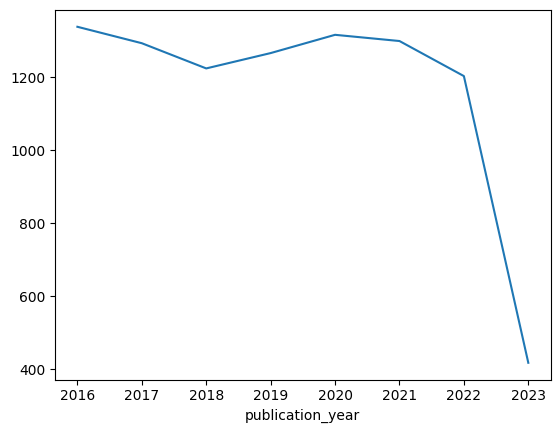

In [3]:
#Prinitng the number of articles published after the Paris agreement in 2015
print(unlabelledData.shape)
unlabelledData.query("publication_year>2015").groupby("publication_year")["id"].count().plot()

In [4]:
labelledData = pd.read_csv("NLP_data/labelled_data.csv")

# create a lower case version of the title without spaces and punctuation, to allow for merging
# labelledData["title_lcase"] = labelledData["title"].apply(lambda x: re.sub("\W", "", x).lower() if isinstance(x, str) else x)

#Data cleaning:
# dropping articles without abstracts
labelledData = labelledData.dropna(subset=["abstract"])
print(labelledData.shape)
labelledData.head()

(2500, 10)


,id,abstract,title,seen,INCLUDE,12 - Coastal and marine Ecosystems,12 - Human and managed,"12 - Mountains, snow and ice","12 - Rivers, lakes, and soil moisture",12 - Terrestrial ES
0,1448689,"The city of Bismarck, North Dakota has one of ...",Key Factors Influencing the Incidence of West ...,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3281128,Changing precipitation regimes can profoundly ...,Asymmetric responses of plant community struct...,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,900708,Climate influences forest structure through ef...,Climate effects on fire regimes and tree recru...,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3234419,"Climate change is likely to bring more, hotter...",Climate change adaptation and mitigation ? a h...,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,2090028,Aim The long-term stability of coastal ecosyst...,Caribbean mangroves adjust to rising sea level...,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [5]:
labelledData['seen'].value_counts()

1.0    2500
Name: seen, dtype: int64

In [6]:
# load the unlabelled Open alex data, and create the same title variable for merging

unlabelledData = unlabelledData.rename(columns={"id": "OA_id"})

#Data cleaning:
# dropping articles without abstracts
unlabelledData = unlabelledData.dropna(subset=["abstract"])
unlabelledData.loc[:, "seen"] = 0
print(f'The dataset has {unlabelledData.shape[0]} rows and {unlabelledData.shape[1]} columns')
unlabelledData.head()

The dataset has 18556 rows and 7 columns


,OA_id,doi,title,publication_year,abstract,authors,seen
2,https://openalex.org/W2122582889,https://doi.org/10.1073/pnas.0505734102,Regional vegetation die-off in response to glo...,2005,Future drought is projected to occur under war...,"David D. Breshears, Neil S. Cobb, Paul Rich, K...",0
3,https://openalex.org/W2170327428,https://doi.org/10.1073/pnas.1422385112,Anthropogenic warming has increased drought ri...,2015,Significance California ranks first in the Uni...,"Noah S. Diffenbaugh, Daniel L. Swain, Danielle...",0
6,https://openalex.org/W2145638163,https://doi.org/10.1098/rstb.2010.0021,Community and ecosystem responses to recent cl...,2010,There is ample evidence for ecological respons...,Gian-Reto Walther,0
7,https://openalex.org/W2120998920,https://doi.org/10.1016/j.tree.2004.07.021,Emerging infectious diseases of plants: pathog...,2004,Emerging infectious diseases (EIDs) pose threa...,"Pamela Sue Anderson, Andrew A. Cunningham, Nik...",0
8,https://openalex.org/W2085588880,https://doi.org/10.1111/j.1365-2486.2007.01404.x,"Influences of species, latitudes and methodolo...",2007,New analyses are presented addressing the glob...,Camille Parmesan,0


In [7]:
# combining both labeled and unlabeled data

df = pd.concat(
    [labelledData, unlabelledData]
)
print(df.shape)
df.head()

(21056, 14)


,id,abstract,title,seen,INCLUDE,12 - Coastal and marine Ecosystems,12 - Human and managed,"12 - Mountains, snow and ice","12 - Rivers, lakes, and soil moisture",12 - Terrestrial ES,OA_id,doi,publication_year,authors
0,1448689.0,"The city of Bismarck, North Dakota has one of ...",Key Factors Influencing the Incidence of West ...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,3281128.0,Changing precipitation regimes can profoundly ...,Asymmetric responses of plant community struct...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
2,900708.0,Climate influences forest structure through ef...,Climate effects on fire regimes and tree recru...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
3,3234419.0,"Climate change is likely to bring more, hotter...",Climate change adaptation and mitigation ? a h...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2090028.0,Aim The long-term stability of coastal ecosyst...,Caribbean mangroves adjust to rising sea level...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


Number of seen vs. unseen documents
seen
0.0    18547
1.0     2500
Name: title, dtype: int64
--------------------------------------------------------------------------------


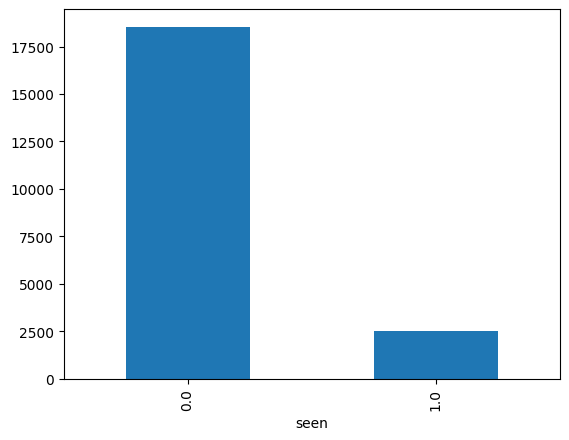

In [8]:
def inspect_labels(df):
    # We can quickly plot how many documents have been labelled, and how many not
    df.groupby("seen")["title"].count().plot.bar();
    print('Number of seen vs. unseen documents')
    print(df.groupby("seen")["title"].count())
    print('-'*80)
    
impacts = [x for x in df.columns if re.match("12 -", x)]
inspect_labels(df)

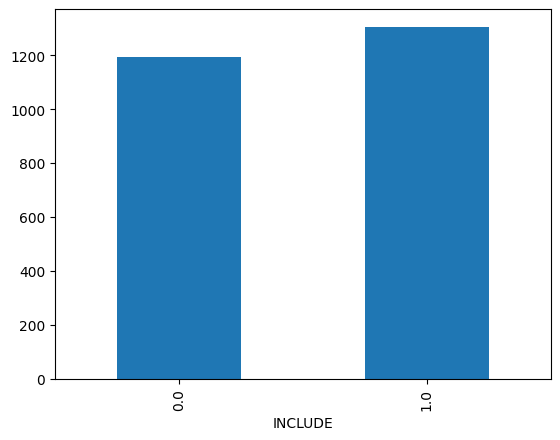

In [9]:
def inspect_labels(df):

    df.groupby("INCLUDE")["title"].count().plot.bar()

impacts = [x for x in df.columns if re.match("12 -", x)]
inspect_labels(df)

Number of included vs. excluded documents
INCLUDE
0.0    1194
1.0    1306
Name: title, dtype: int64


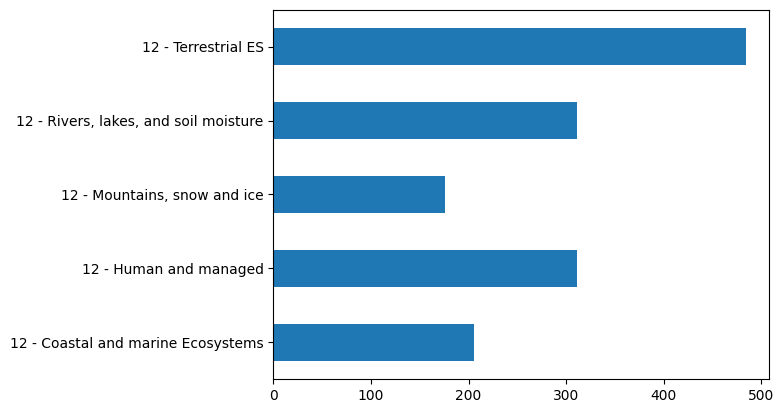

In [10]:
def inspect_labels(df):
  
    print('Number of included vs. excluded documents')
    print(df.groupby("INCLUDE")["title"].count())
    # Finally we can plot how many examples of each impact type we have
    df[impacts].sum().plot.barh();
impacts = [x for x in df.columns if re.match("12 -", x)]
inspect_labels(df)

In [11]:
from sklearn.model_selection import train_test_split
def train_test_split_df(df):
    ''' Gets train/test splits for INCLUDE prediction task.
    '''
    # select only the seen documents
    all_seen = df[df["seen"] == 1].sample(2000).index
    all_x = df[df["seen"] == 1]["abstract"].values
    all_y = df[df["seen"] == 1]["INCLUDE"].values.astype(int)
    # percent of data to use for train, val, test
    train_size = 0.8
    # train_size = 0.01
    # get the indices for each split
    x_train, x_test, y_train, y_test = train_test_split(all_x, all_y, train_size=train_size, random_state=42)
    assert len(x_train) == len(y_train)
    assert len(x_test) == len(y_test)
    print (f"Train size: {len(x_train)}")
    print (f"Test size: {len(x_test)}")
    return x_train, y_train, x_test, y_test

Pipeline for a simple machine learning model

In [12]:
def visualize_doc_vec(X, features=None):
    '''Simple function to visualise a document-term matrix'''
    print('Document-term matrix:\n', X.todense())
    # And we could visualise this simply like this
    fig, ax = plt.subplots()
    doc_map = ax.imshow(X.todense(), cmap="Blues")
    ax.set_xticks(np.arange(len(features)))
    ax.set_xticklabels(features, rotation=45, ha="right")
    cbar = fig.colorbar(doc_map)
    plt.show()

Document-term matrix:
 [[0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0]
 [0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1]]


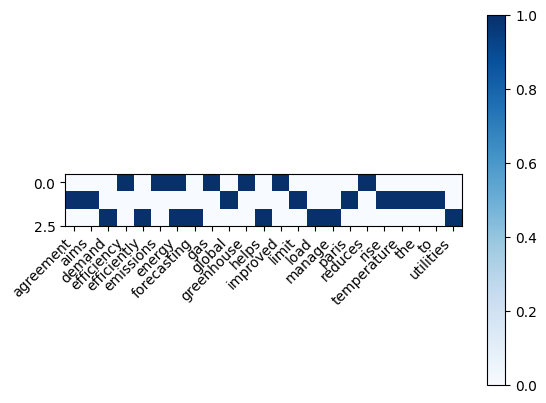

In [13]:
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


def show_raw_counts(texts):
    '''
    Function to show the raw counts of words in a corpus and visualize them.
    '''
    # We'll instantiate a vectorizer class
    vectorizer = CountVectorizer()

    # And apply the fit_transform method to our texts
    X = vectorizer.fit_transform(texts)

    # This gives us a matrix of shape n_texts, vocab_size
    X.todense()

    # The features each column represents can be accessed here
    features = vectorizer.get_feature_names_out()
    visualize_doc_vec(X, features)

# Let's take for now a couple of example texts
texts = [
    "Improved energy efficiency reduces greenhouse gas emissions",
    "The Paris Agreement aims to limit global temperature rise",
    "Load forecasting helps utilities manage energy demand efficiently",
]
# And now lets visualize the raw word counts in our 3 sentences.
show_raw_counts(texts)

Document-term matrix:
 [[0.         0.         0.         0.38988801 0.         0.38988801
  0.29651988 0.         0.38988801 0.         0.38988801 0.
  0.38988801 0.         0.         0.         0.         0.38988801
  0.         0.         0.         0.         0.        ]
 [0.33333333 0.33333333 0.         0.         0.         0.
  0.         0.         0.         0.33333333 0.         0.
  0.         0.33333333 0.         0.         0.33333333 0.
  0.33333333 0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.36325471 0.         0.36325471 0.
  0.27626457 0.36325471 0.         0.         0.         0.36325471
  0.         0.         0.36325471 0.36325471 0.         0.
  0.         0.         0.         0.         0.36325471]]


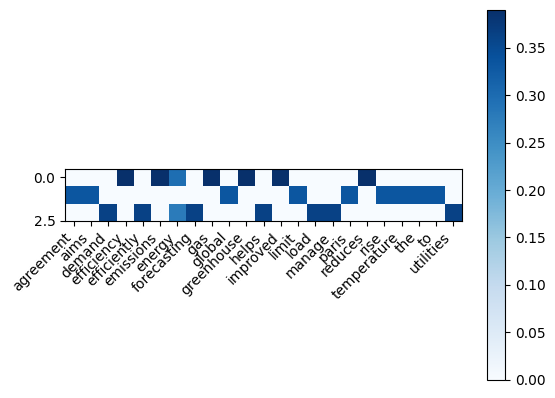

In [14]:
def show_tfidf(texts):
    '''
    Function to show the tf-idf scores of words in a corpus and visualize them.
    '''
    # We'll instantiate a term frequency - inverse document frequency vectorizer class
    vectorizer = TfidfVectorizer()

    # And apply the fit_transform method to our texts
    X = vectorizer.fit_transform(texts)

    # This gives us a matrix of shape n_texts, vocab_size
    X.todense()

    # The features each column represents can be accessed here
    features = vectorizer.get_feature_names_out()
    visualize_doc_vec(X, features)

show_tfidf(texts)

In [15]:
# From the above matrix we see that our model gives filler words like "the", 
# "helps", "improved" and most likely many other low weight words less
# importance by using Term Frequency inverse document frequency
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

def build_svm(dummy_data, y):
    '''
    Function to create a pipeline with a tf-idf vectorizer and a support vector machine classifier.
    '''
    svm_classifier = Pipeline(
        steps=[
            ("vect", TfidfVectorizer()),
            ("clf", SVC(probability=True, class_weight="balanced")),
        ]
    )
    svm_classifier.fit(dummy_data, y)
    return svm_classifier


# Adding more dummy data on load forecasting, the Paris Agreement, and LULC
dummy_data, y = zip(
    *[
        ("Renewable energy is essential for mitigating climate change", 1),
        ("The Paris Agreement aims to limit global temperature rise", 1),
        ("Solar power generation is increasing worldwide", 1),
        ("Load forecasting helps utilities manage energy demand efficiently", 0),
        ("Transitioning to clean energy is necessary for sustainable development", 1),
        ("Climate models predict more extreme weather events in the future", 1),
        ("Improved energy efficiency reduces greenhouse gas emissions", 0),
        ("Investing in wind farms helps reduce reliance on fossil fuels", 1),
        ("Land use changes affect regional climate patterns", 0),
        ("Hydropower plants provide clean and renewable energy", 1),
        ("The electrification of transportation reduces carbon emissions", 1),
        ("Carbon pricing mechanisms incentivize emission reductions", 0),
        ("Urbanization alters local microclimates and energy demand", 0),
        ("Smart grids optimize energy distribution and reduce wastage", 0),
        ("Afforestation and reforestation projects sequester carbon dioxide", 1),
    ]
)

svm_classifier = build_svm(dummy_data, y)
svm_classifier

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', SVC(class_weight='balanced', probability=True))])

In [16]:
 #We can now use this classifier to make predictions about new texts
new_texts = [
    "The effects of climate change on terrestrial ecosystems are alarming",
    "Machine learning algorithms can contribute to mitigating climate change impacts",
    "The beverage industry, including companies like Coca Cola, faces scrutiny for sugary drink production",
]
# We can make predictions about which class the examples belong to
print('predictions:', svm_classifier.predict(new_texts))
# We can also get these as probabilities (which are very unstable with small datasets, and not guaranteed to match the predictions)
print('probabilities:\n', svm_classifier.predict_proba(new_texts))

predictions: [1 1 1]
probabilities:
 [[0.72538528 0.27461472]
 [0.74632356 0.25367644]
 [0.74019081 0.25980919]]


In [17]:
# Each row contains predicted probabilites for each class, in this case 0, and 1

# We can get predicted probabilities of being in the INCLUDE class like this
# One for each of the three examples
svm_classifier.predict_proba(new_texts)[:, 1]

array([0.27461472, 0.25367644, 0.25980919])

In [18]:
from sklearn.metrics import classification_report

def train_eval_svm(df):
    # load the train/test splits
    x_train, y_train, x_test, y_test = train_test_split_df(df)
    # build the classifier
    svm_classifier = build_svm(x_train, y_train)
    # get the predictions on the test set
    test_pred = svm_classifier.predict(x_test)
    # Get the classification evaluation metrics
    print(classification_report(y_test, test_pred))

# So far this was an illustrative example using toy data. Let's now apply this to our real data.
# takes around 20 seconds to run
train_eval_svm(df)

Train size: 2000
Test size: 500
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       235
           1       0.82      0.87      0.84       265

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



Multilabel

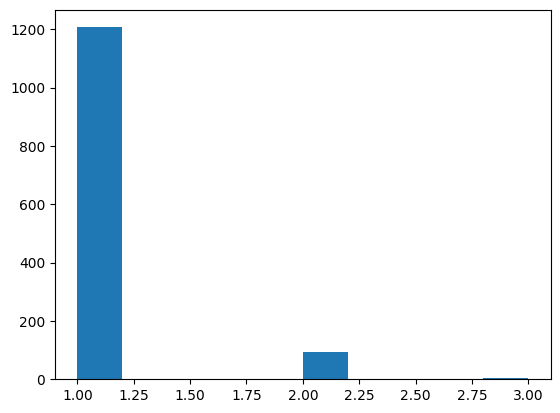

In [19]:
# This plot shows that certain documents have multiple labels for different impacts.
plt.hist(df[df["INCLUDE"] == 1][impacts].sum(axis=1));

In [20]:
# create an x and y variable with a sample of 200 relevant documents
samples = df[df["INCLUDE"] == 1].sample(200).index
X = df.iloc[samples]["abstract"]
y = df.iloc[samples][impacts].values
np.set_printoptions(threshold=5)

In [21]:
from sklearn.multiclass import OneVsRestClassifier

clf = Pipeline(
    steps=[
        ("vec", TfidfVectorizer()),
        ("clf", OneVsRestClassifier(SVC(probability=True, class_weight="balanced"))),
    ]
)

clf.fit(X, y)

Pipeline(steps=[('vec', TfidfVectorizer()),
                ('clf',
                 OneVsRestClassifier(estimator=SVC(class_weight='balanced',
                                                   probability=True)))])

In [22]:
example_texts = [
    "Warmer temperatures over time are changing weather patterns and disrupting the usual balance of nature. This poses many risks to human beings and all other forms of life on Earth.",
    "The average temperature of the Earth’s surface is now about 1.1°C warmer than it was in the late 1800s (before the industrial revolution) and warmer than at any time in the last 100,000 years. The last decade (2011-2020) was the warmest on record, and each of the last four decades has been warmer than any previous decade since 1850. ",
]
y_pred = clf.predict(example_texts)

pd.DataFrame(y_pred, columns=impacts)

,12 - Coastal and marine Ecosystems,12 - Human and managed,"12 - Mountains, snow and ice","12 - Rivers, lakes, and soil moisture",12 - Terrestrial ES
0,0,0,0,0,0
1,0,0,0,0,0


Transfer Learning with Transformers

In [23]:
# Each example is a tuple of (text, label)
# Where a label is 1 if the text is relevant and should be included in a synthesis report and 0 otherwise
texts, y = zip(
    *[
        ("Renewable energy is essential for mitigating climate change", 1),
        ("The Paris Agreement aims to limit global temperature rise", 1),
        ("Solar power generation is increasing worldwide", 0),
        ("Load forecasting helps utilities manage energy demand efficiently", 0),
        ("Transitioning to clean energy is necessary for sustainable development", 1),
        ("Climate models predict more extreme weather events in the future", 1),
        ("Improved energy efficiency reduces greenhouse gas emissions", 0),
        ("Investing in wind farms helps reduce reliance on fossil fuels", 1),
        ("Land use changes affect regional climate patterns", 1),
        ("Hydropower plants provide clean and renewable energy", 1),
        ("The electrification of transportation reduces carbon emissions", 1),
        ("Carbon pricing mechanisms incentivize emission reductions", 0),
        ("Urbanization alters local microclimates and energy demand", 0),
        ("Smart grids optimize energy distribution and reduce wastage", 1),
        ("Afforestation and reforestation projects sequester carbon dioxide", 1),
    ]
)

In [24]:
# To use these with transformers, we are going to need to get them into the right format.
from datasets import Dataset
from transformers import AutoTokenizer

# First we'll put them into a HuggingFace Dataset object
dataset = Dataset.from_dict({"text": texts, "label": y})

# And now we need to tokenize the texts, using the pretrained tokenizer from climatebert
model_name = "climatebert/distilroberta-base-climate-f"
tokenizer = AutoTokenizer.from_pretrained(model_name)


def tokenize_function(examples):
    return tokenizer(examples["text"], padding="longest", truncation=True)


tokenized_dataset = dataset.map(tokenize_function, batched=True)
# input_ids are the token ids for each token in the text
# attention_mask is a mask that tells the model which tokens to pay attention to and which to ignore
# Note the attention mask has 0s for padded tokens.
tokenized_dataset[0]

Map:   0%|          | 0/15 [00:00<?, ? examples/s]

{'text': 'Renewable energy is essential for mitigating climate change',
 'label': 1,
 'input_ids': [0,
  34837,
  2753,
  868,
  1007,
  16,
  4499,
  13,
  31904,
  2147,
  464,
  2,
  1,
  1,
  1,
  1],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]}

In [25]:
# We can wrap this into one function that turns any set of texts (and optional labels)
# into a tokenized huggingface dataset
def datasetify(x, tokenizer, y=None):
    data_dict = {"text": x}
    if y is not None:
        data_dict["label"] = y
    dataset = Dataset.from_dict(data_dict)

    def tokenize_function(examples):
        return tokenizer(examples["text"], padding="longest", truncation=True)

    return dataset.map(tokenize_function, batched=True)


tokenized_dataset = datasetify(texts, tokenizer, y)
tokenized_dataset[0]

Map:   0%|          | 0/15 [00:00<?, ? examples/s]

{'text': 'Renewable energy is essential for mitigating climate change',
 'label': 1,
 'input_ids': [0,
  34837,
  2753,
  868,
  1007,
  16,
  4499,
  13,
  31904,
  2147,
  464,
  2,
  1,
  1,
  1,
  1],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]}

In [26]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

# Load pre-trained model and tokenizer
model_name = "climatebert/distilroberta-base-climate-f"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at climatebert/distilroberta-base-climate-f and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
# To generate predictions, we just need to supply a dataset to the predict method
new_texts = [
    "climate change is impacting terrestrial ecosystems",
    "Machine Learning will solve climate change",
    "Supreme court made a series of decisions on personal freedom",
]

# Tokenize the new texts
tokenized_texts = tokenizer(new_texts, padding=True, truncation=True, return_tensors="pt")

In [28]:
# Tokenize the new texts
tokenized_texts = tokenizer(new_texts, padding=True, truncation=True, return_tensors="pt")

# Perform predictions
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
predictions = classifier(new_texts)

# Display predictions
for text, prediction in zip(new_texts, predictions):
    print(f"Text: {text}")
    print(f"Predicted label: {prediction['label']}")
    print(f"Confidence score: {prediction['score']}")
    print()


Text: climate change is impacting terrestrial ecosystems
Predicted label: LABEL_0
Confidence score: 0.501624584197998

Text: Machine Learning will solve climate change
Predicted label: LABEL_0
Confidence score: 0.5007845163345337

Text: Supreme court made a series of decisions on personal freedom
Predicted label: LABEL_0
Confidence score: 0.5035682916641235



In [29]:
samples = df[df["INCLUDE"] == 1].sample(5).index
X = df.iloc[samples]["abstract"]
y = df.iloc[samples][impacts].values

Model Evaluation

In [30]:
import numpy as np

# Let's examine
y_pred = np.array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0])
y_true = np.array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

def calculate_accuracy(y_true, y_pred):
    total_predictions = y_true.size
    correct_predictions = (y_pred==y_true).sum()
    accuracy = correct_predictions / total_predictions
    print(f"{correct_predictions} correct predictions out of {total_predictions} total predictions.\nAccuracy = {accuracy:.0%}")

calculate_accuracy(y_true, y_pred)

8 correct predictions out of 10 total predictions.
Accuracy = 80%


In [31]:
calculate_accuracy(y_true, np.zeros(y_true.size))

8 correct predictions out of 10 total predictions.
Accuracy = 80%


Precision and Recall

In [32]:
def calculate_precision(y_true, y_pred):
    tps = (y_true+y_pred==2).sum()
    positive_predictions = (y_pred==1).sum()
    precision = tps / positive_predictions
    print(f"{tps} out of {positive_predictions} predicted positives are actually positive")
    print(f"precision = {precision:.0%}")

# Our predictions achieve a much more modest precision score
calculate_precision(y_true, y_pred)
# Whereas predicting all zeros gives us NA result as the denominator is zero
calculate_precision(y_true, np.zeros(y_true.size))

1 out of 2 predicted positives are actually positive
precision = 50%
0 out of 0 predicted positives are actually positive
precision = nan%


/var/folders/lv/f438lqnj5k76dlkjd35vm4wr0000gn/T/ipykernel_69913/4293625237.py:4: RuntimeWarning: invalid value encountered in scalar divide
  precision = tps / positive_predictions


In [33]:
def calculate_recall(y_true, y_pred):
    tps = (y_true+y_pred==2).sum()
    positive_samples = (y_true==1).sum()
    recall = tps / positive_samples
    print(f"{tps} out of {positive_samples} true samples are identified")
    print(f"recall = {recall:.0%}")

# Recall is also more modest with our predictions
calculate_recall(y_true, y_pred)
# And a prediction of all zeros has zero recall
calculate_recall(y_true, np.zeros(y_true.size))

1 out of 2 true samples are identified
recall = 50%
0 out of 2 true samples are identified
recall = 0%
